# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions.

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

As a data scientist, we should get used to googling for code, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv

# Converting csv to a dictionary of lists
sat_scores_dict = {'State': [], 'Rate':[], 'Verbal':[], 'Math':[]}
with open("sat_scores.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for key, value in row.items():
            sat_scores_dict[key].append(value)

In [3]:
sat_scores_dict.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math'])

In [4]:
sat_scores_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# DataFrame of stats loading with pandas.read_csv() function
sat_scores = pd.read_csv('sat_scores.csv')
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
# DataFrame converted from SAT dictionary

sat_scores_dict_1 = pd.DataFrame.from_dict(sat_scores_dict)
sat_scores_dict_1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). Pandas interpreted the numeric columns as `integers`.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

In [7]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [8]:
sat_scores.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


- Side obervation that index 51 contains a row with All.
- Doing some background checking, the ALL row is not the average of the 50 obervations before it.
- The decision made is to drop the row for a more accurate result.

In [9]:
sat_scores.drop(sat_scores.tail(1).index,inplace=True)

In [10]:
sat_scores.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [11]:
sat_scores.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

## sat_data (Dictionary):
'State': dtype = `object`, Description: The states which the exam scores were taken from <br>
'Rate': dtype = `int64`, Description: Rate of exam participation by students within the state <br>
'Verbal': dtype = `int64`, Description: Average test scores for Verbal section <br>
'Math': dtype = `int64`, Description: Average test scores for Math section <br>
#### Shape of dataset: 52 rows and 4 columns

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[distplot documentation for arguments and fine-tuning the chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [13]:
import seaborn as sns

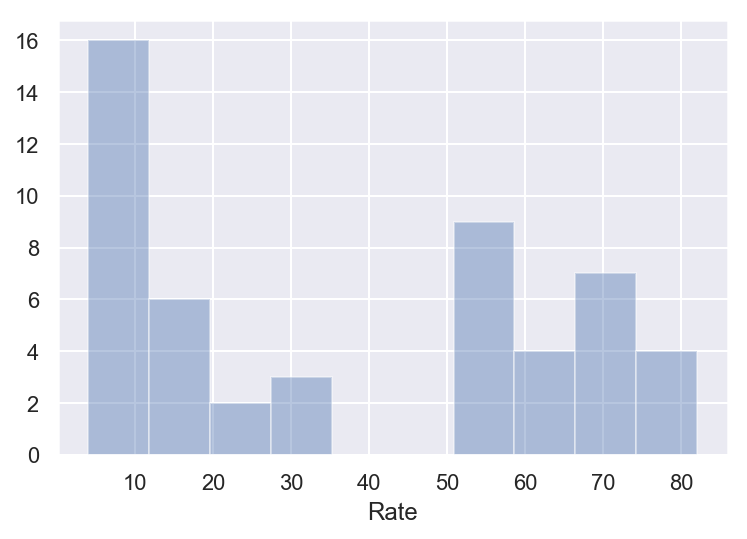

In [14]:
sns.set(); np.random.seed(0)
ax = sns.distplot(sat_scores['Rate'],kde=False,bins=10)

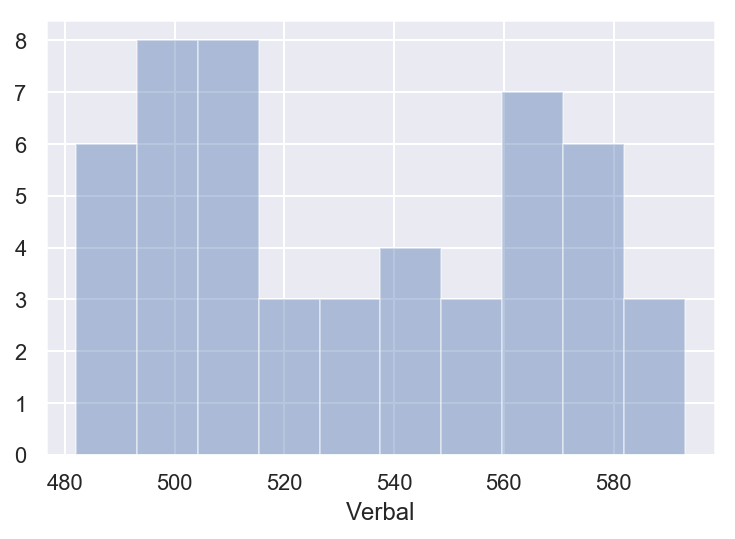

In [15]:
sns.set(); np.random.seed(0)
ax = sns.distplot(sat_scores['Verbal'],kde=False,bins=10)

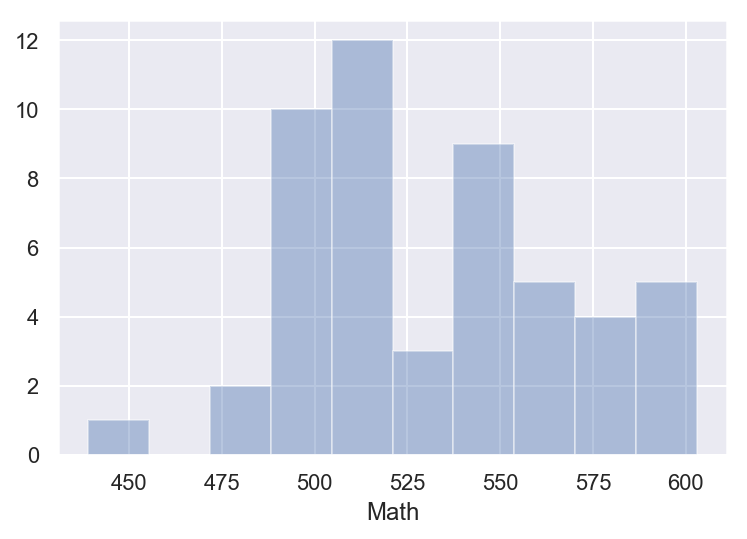

In [16]:
sns.set(); np.random.seed(0)
ax = sns.distplot(sat_scores['Math'],kde=False,bins=10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[pairplot documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/Users/ivanong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/ivanong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


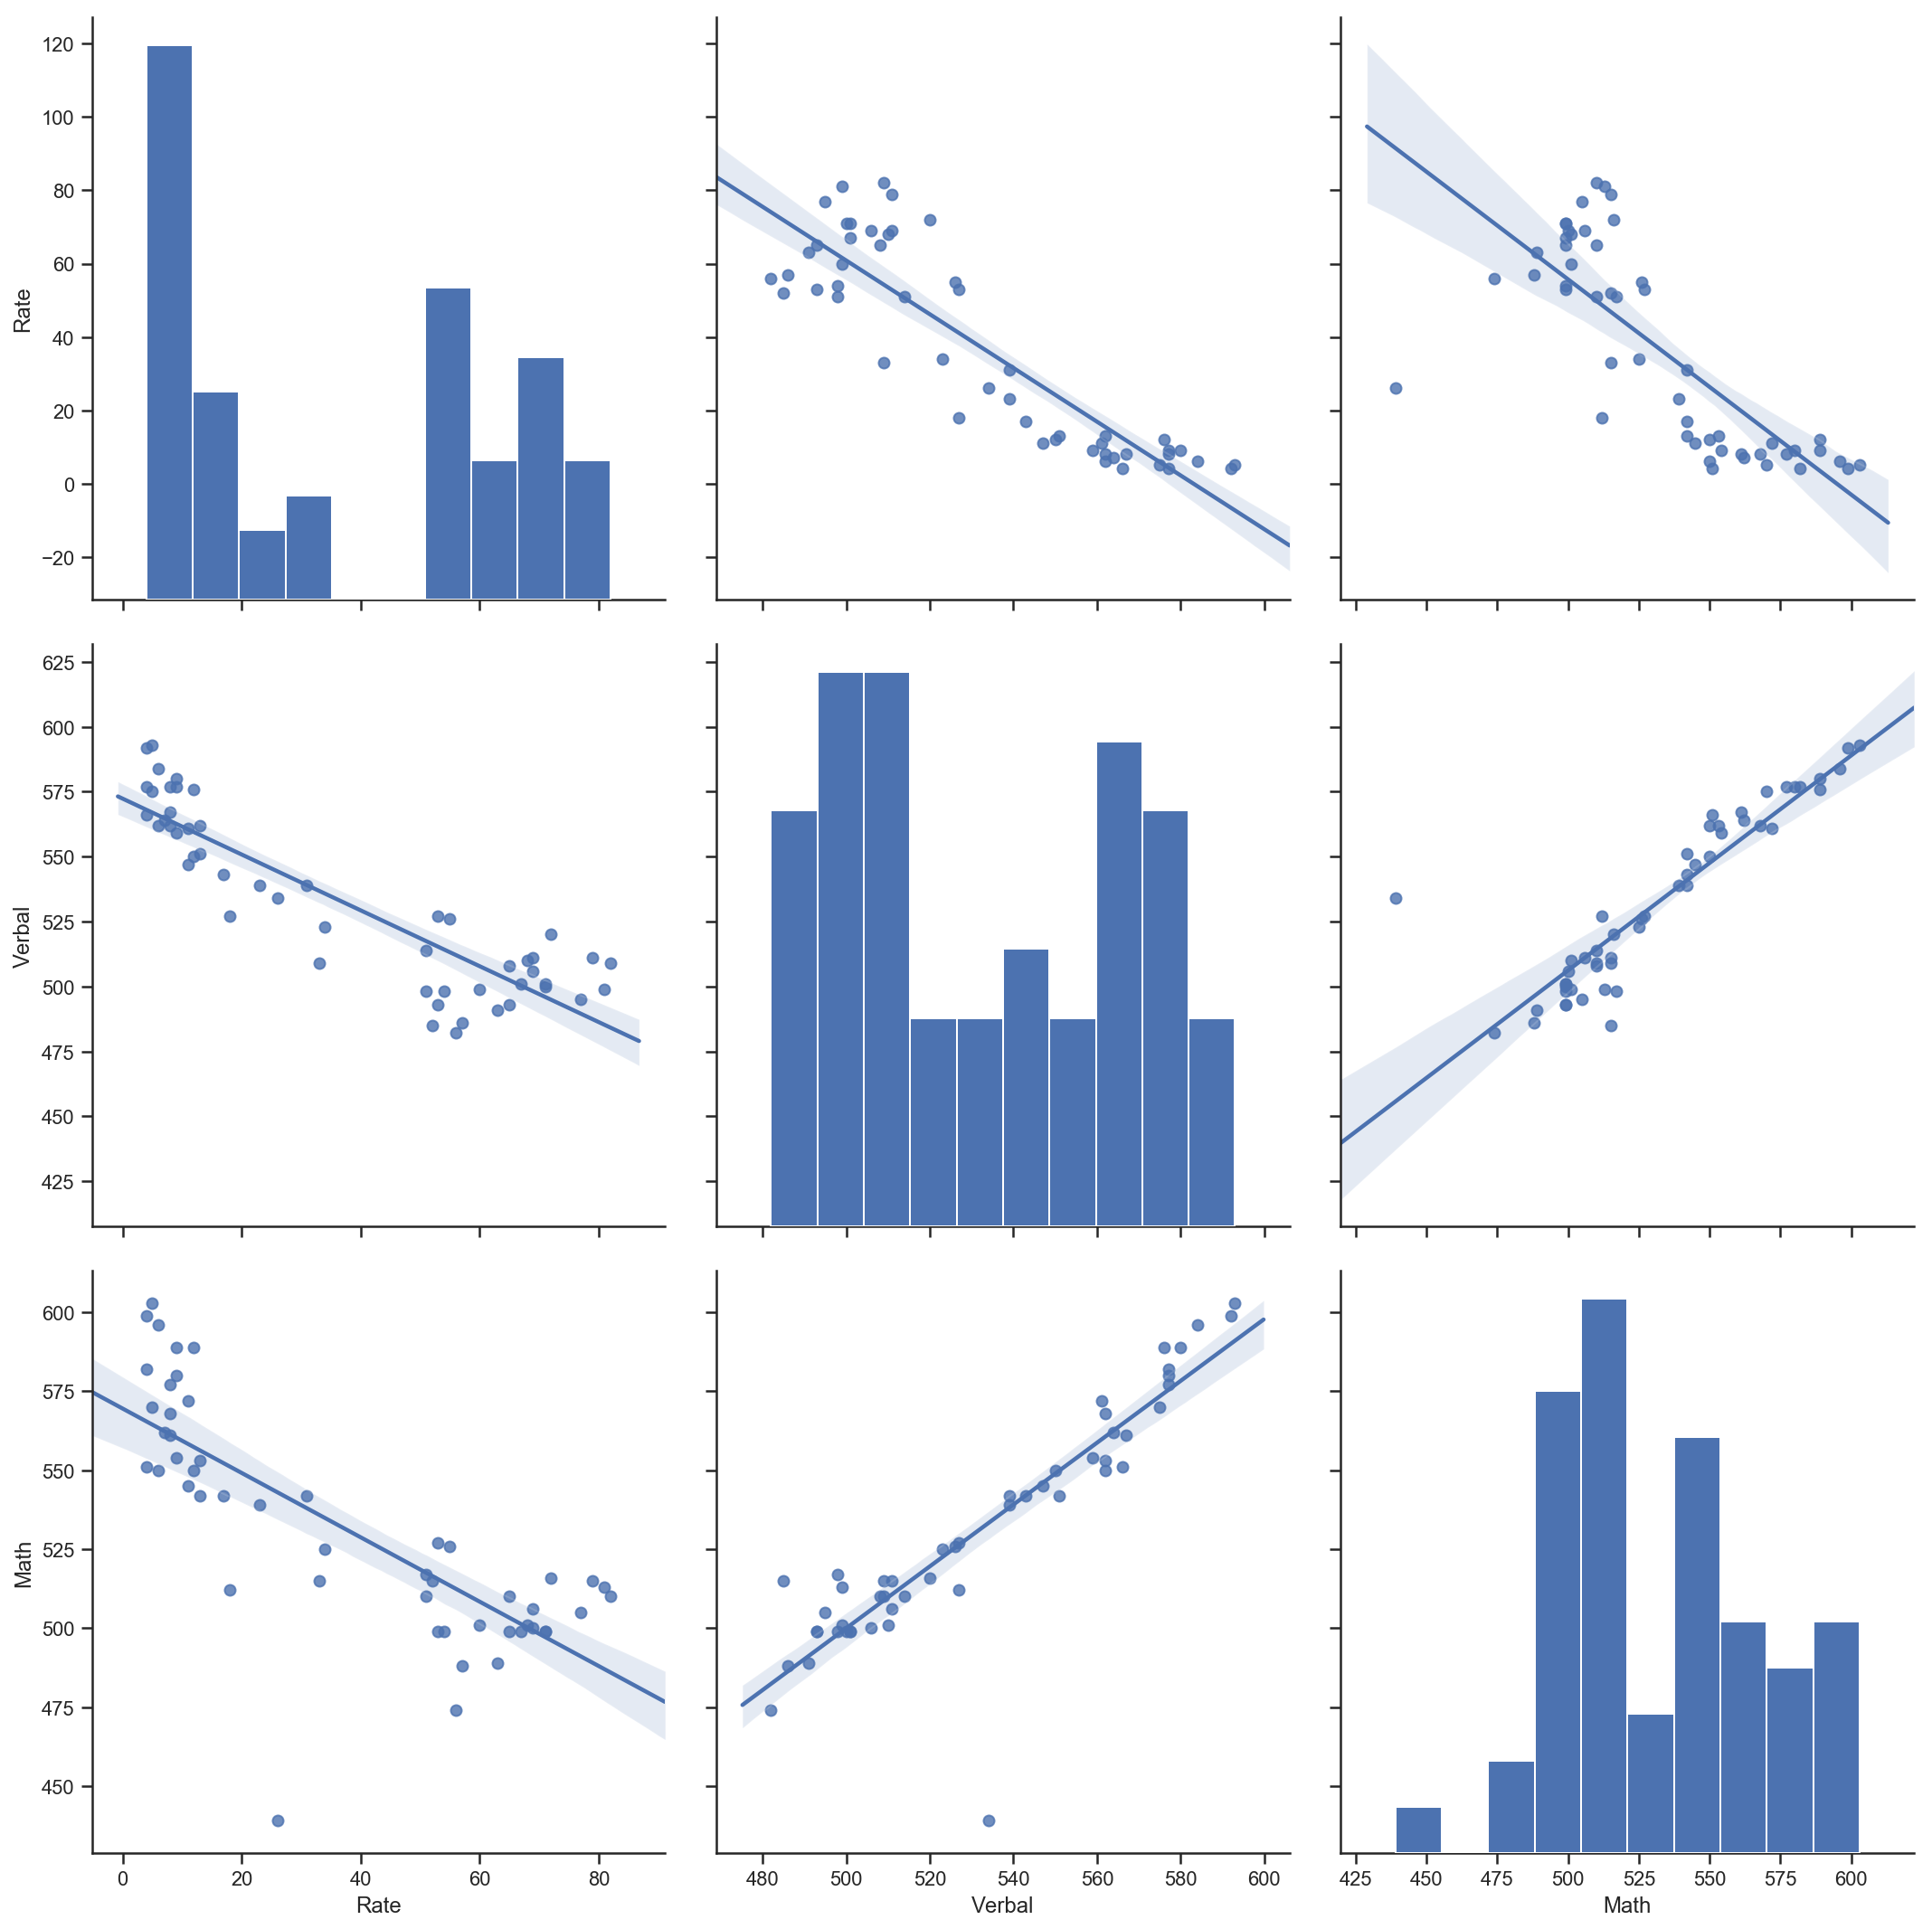

In [17]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(sat_scores, kind='reg',size=5)

##### Observation from the above plots:

1. Apart from a few outliers, there is are strong negative correlation between Rate/Verbal and Rate/Math. This means that the lower the participation rate of a state, the higher the average scores would turn out to be.
2. There is a strong positive correlation between Math/Verbal. This means that higher scoring of average scores for math will result in an higher average scores for verbal too.

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [18]:
# Reading the pandas dataframe of sat scores
df = pd.DataFrame(sat_scores)

# Subsetting the dataframe and storing it in a variable
df_verbal_math = df.loc[:,['Math','Verbal']]

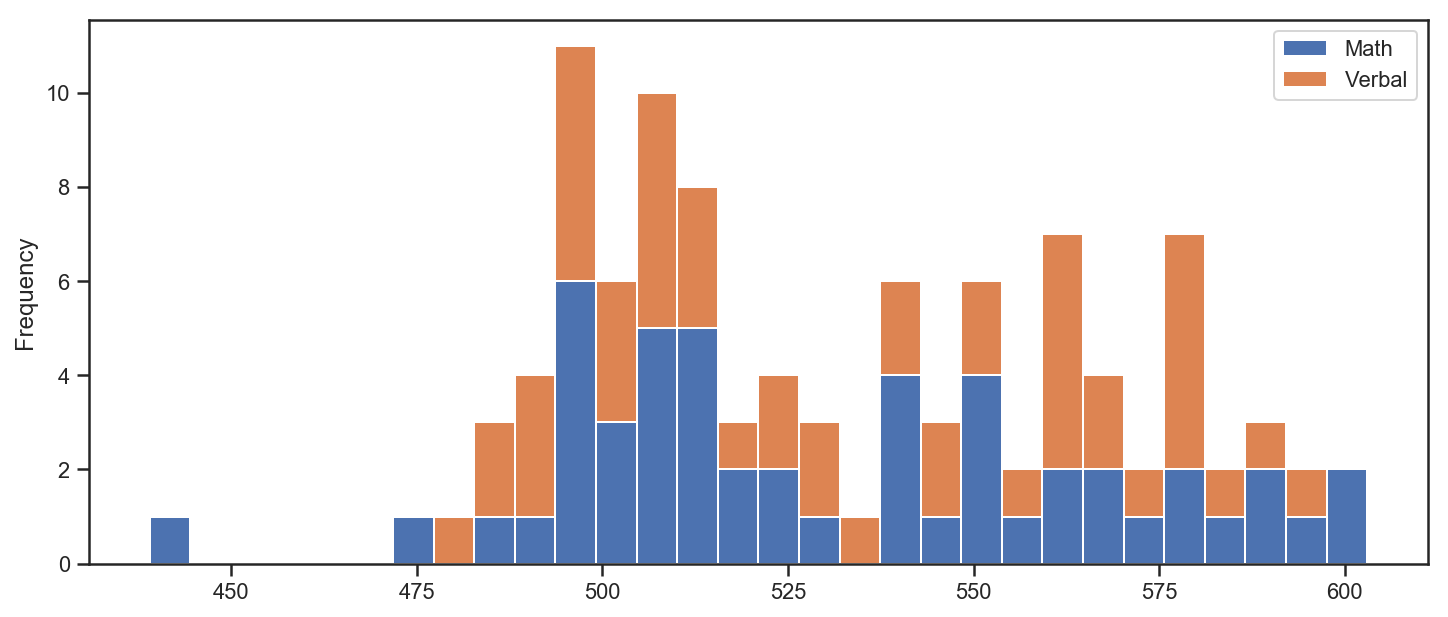

In [19]:
df_verbal_math.plot.hist(stacked=True, bins=30, figsize=[12,5])

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

## My Answer:
Plotting a box-plot of Rate will not be proportinate to Verbal and Math scores.
This is because rate is a percentage (0 to 100%) whereas Math and Verbal are scores of a test that range between 400 to 700. 

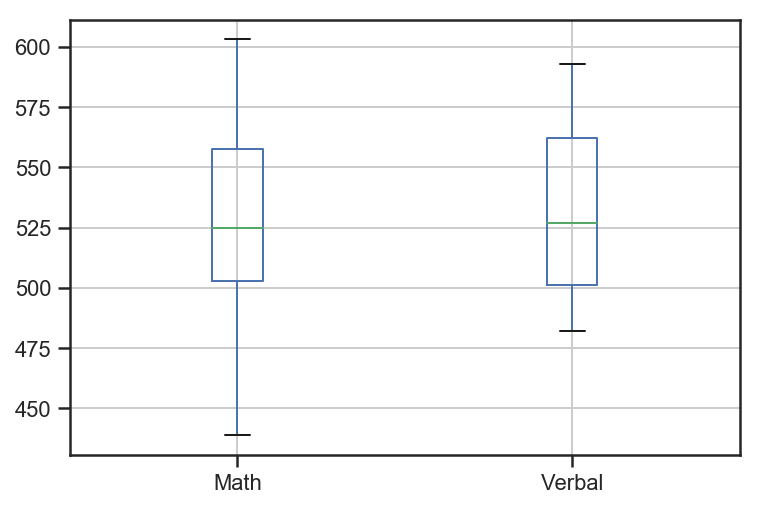

In [20]:
df_verbal_math.plot.box(grid=True)

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


--
To be able for Rate to make sense in the same chart, I have decided to standardise all variables. <br>
The formula is: Standardised Variable = (Variable - Mean of variable ) / Std Dev of Variable 

In [21]:


rate_stand = (df['Rate']- df['Rate'].mean()) / df['Rate'].std()
math_stand = (df['Math']- df['Math'].mean()) / df['Math'].std()
verbal_stand = (df['Verbal']- df['Verbal'].mean()) / df['Verbal'].std()

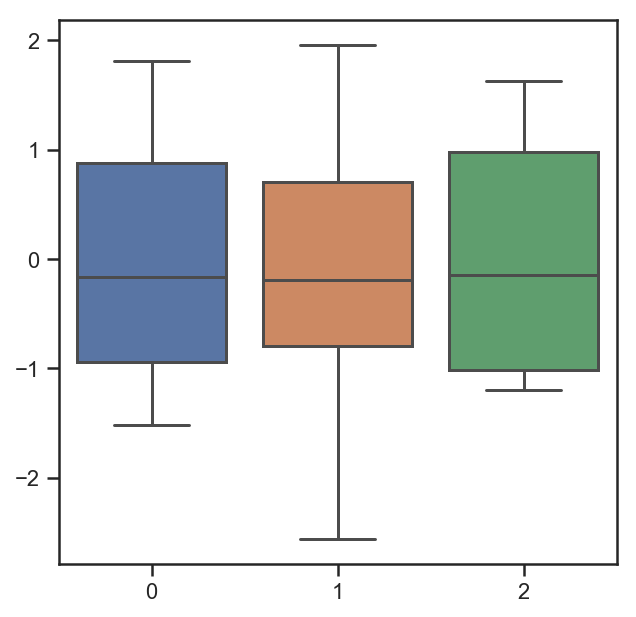

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=[verbal_stand,math_stand,rate_stand])
plt.show()

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
# Creating a placeholder for mean
verbal_mean = sat_scores['Verbal'].mean()

verbal_scores = df.loc[:,['State','Verbal']]

# List of states with Verbal scores above the mean
df[verbal_scores['Verbal'] > verbal_mean]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [24]:
# Counting the above list
df[verbal_scores['Verbal'] > verbal_mean]['State'].count()

24

Analysis: 24 states are scoring above the mean verbal score. This indicates that because essentially half of the states are above the mean, the distribution of verbal scores is not significantly skewed positively or negatively.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
verbal_subset = sat_scores.loc[sat_scores['Verbal'] > sat_scores['Verbal'].mean(), :]
verbal_subset

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [26]:
# Creating a placeholder for mean
verbal_median = sat_scores['Verbal'].median()

# List of states with Verbal scores above the mean

df[verbal_scores['Verbal'] > verbal_median]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [27]:
df[verbal_scores['Verbal'] > verbal_median]['State'].count()

24

In [28]:
verbal_med_subset = sat_scores.loc[sat_scores['Verbal'] > sat_scores['Verbal'].median(), :]
verbal_med_subset

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [29]:
print ('States above mean verbal score:', verbal_subset.State.count())
print ('States above median verbal score:', verbal_med_subset.State.count())
print ('Verbal mean:', sat_scores['Verbal'].mean())
print ('Verbal median:', sat_scores['Verbal'].median())

States above mean verbal score: 24
States above median verbal score: 24
Verbal mean: 532.5294117647059
Verbal median: 527.0


**Answer: Both mean and median have 24 states above. Again, this is not a skewed distribution.**

Just a note: SAT scores are normalized scores to give takers their "percentile", so non-skewness properties are enforced. You may have explored this in a later unrequired question.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [30]:
df['Verbal - Math'] = df['Verbal'] - df['Math']
df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
verbal_greater = df.sort_values(by=['Verbal - Math'],ascending=False)

top_10_verbal = verbal_greater.head(10)

subset_verbal_greater = top_10_verbal.reset_index(drop=True).copy()

subset_verbal_greater.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15


In [32]:
math_greater = df.sort_values(by=['Verbal - Math'])

top_10_math = math_greater.head(10)


subset_math_greater = top_10_math.reset_index(drop=True).copy()

subset_math_greater.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [33]:
sat_scores[['Verbal','Math','Rate','Verbal - Math']].corr()

,Verbal,Math,Rate,Verbal - Math
Verbal,1.000000,0.899909,-0.888121,0.044527
Math,0.899909,1.000000,-0.773419,-0.395574
Rate,-0.888121,-0.773419,1.000000,-0.098671
Verbal - Math,0.044527,-0.395574,-0.098671,1.000000


**Answer:** The correlation matrix shows us the (linear) relationships between variables as measured by the Pearson correlation coefficient. A Pearson r of -1 is a perfect inverse relationship, a 1 is a perfect relationship, and a 0 is no linear relationship.

Here's what we can see from the correlation matrix:

1. Verbal score is highly correlated with Math. So, States that score higher in one tend to score higher in the other, and vice versa.
2. Verbal is negatively correlated with rate. The higher proportion of students that take the SAT, the lower the average Verbal score.
3. Likewise, Math is negatively correlated with Rate as well, though not as much.
4. Verbal score has little to no relationship with the difference between verbal and math scores. What does this mean? As Verbal scores go up, this does not imply that the difference between verbal and Math increases!
5. Interestingly, the difference between verbal and math has a decent negative correlation with Math. This indicates that as the difference between verbal and math increases, average Math score is more likely to decrease.
6. Rate and verbal-math difference has a small, likely insignificant negative correlation.

So, you are probably wondering, **why is there no correlation between Verbal and the difference, but a negative correlation between Math and the difference?**

Let's create a pairplot of the variables to help understand this:

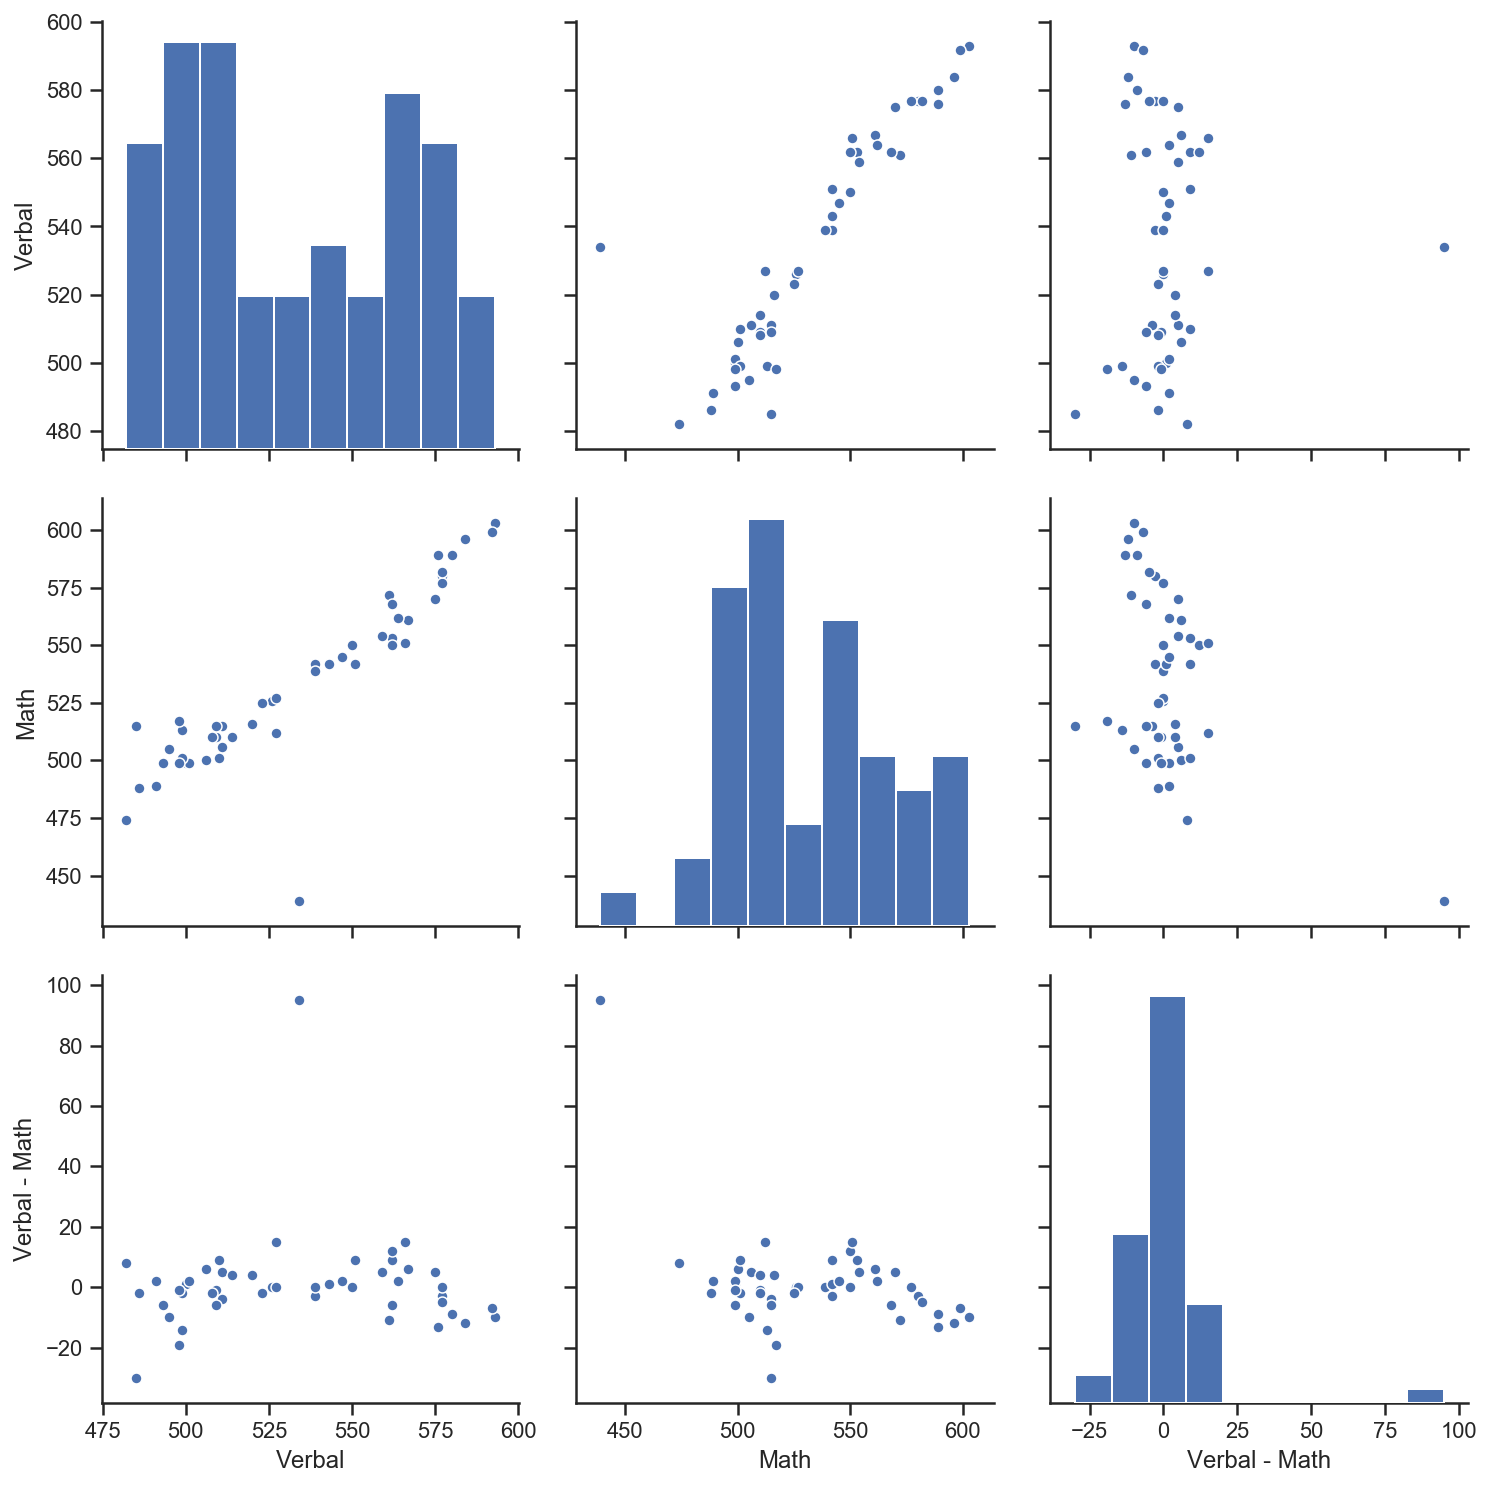

In [34]:
sns.pairplot(sat_scores[['Verbal','Math','Verbal - Math']], height=3.5, plot_kws={'s':30})

Besides that weird outlier, it looks like there isn't much of a correspondence. Is the difference in the correlations caused by the outlier?

I'll find the outlier state and remove it, then look at the correlation matrix again.

In [35]:
outlier_mask = (sat_scores['Verbal - Math'] == sat_scores['Verbal - Math'].max())
outlier_state = sat_scores.loc[outlier_mask, :]
outlier_state

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95


In [36]:
sat_nooutlier = sat_scores.loc[sat_scores['State'] != 'OH', :]
sat_nooutlier.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.889227,-0.854664,-0.095529
Verbal,-0.889227,1.000000,0.969265,0.074463
Math,-0.854664,0.969265,1.000000,-0.173161
Verbal - Math,-0.095529,0.074463,-0.173161,1.000000


The correlation between Math and the difference has been dramatically reduced. This is an example of how outliers can affect your statistical metrics in unsavory ways, and why you need to be rigorous about examining your data.

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [37]:
df.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


# Ivan's Answer: Rows explanation

1. The count row shows the number of observations of each column.
2. The mean row shows the average value of each column for all states.
3. Std refers to standard deviation and this measures how much each observation differes from the mean
4. Min row is the lowest observed value for each column
5. 25% refers to the 25th percentile value of each column
6. 50% refers to the 50th percentile value of each colum, aka the mean
7. 75% refers to the 75th percentile value of each colum
8. Max row is the highest observed value of each column

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [38]:
sat_cov = sat_scores.cov()
sat_cov

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


# Answer:
1. The covariance matrix indicates how two variables are related. A positive correlation means there is a positive relationship between the variables. However, as compared to correlation matrix, correlation matrix does not show how much they are related.
2. The covariance can be converted to correlation by dividing it with the standard deviations of the two variables measured.
3. Correlation matrix provides a simpler way to view the relationship between two variables by not taking in the measure

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [39]:
# Loading the new data
drug = pd.read_csv('drug-use-by-age.csv')
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [40]:
# Data cleaning to be performed
# To replace '-' vaues with NaN so that corresponding row types can be float

drug.replace('-', np.nan,inplace=True)

In [41]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [42]:
# Converting appropriate columns to type float64
for i in drug.columns:
    try:
        drug[i] = drug[i].astype('float64')
    except:
        drug[i] = drug[i]

In [43]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null float64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyco

In [44]:
# Checking for null values
drug.isnull().any()

age                        False
n                          False
alcohol-use                False
alcohol-frequency          False
marijuana-use              False
marijuana-frequency        False
cocaine-use                False
cocaine-frequency           True
crack-use                  False
crack-frequency             True
heroin-use                 False
heroin-frequency            True
hallucinogen-use           False
hallucinogen-frequency     False
inhalant-use               False
inhalant-frequency          True
pain-releiver-use          False
pain-releiver-frequency    False
oxycontin-use              False
oxycontin-frequency         True
tranquilizer-use           False
tranquilizer-frequency     False
stimulant-use              False
stimulant-frequency        False
meth-use                   False
meth-frequency              True
sedative-use               False
sedative-frequency         False
dtype: bool

In [45]:
# Finding the null values for each column

null_columns = drug.columns[drug.isnull().any()]
print(drug[null_columns].isnull().sum())

# Showing all rows with a null value present

print(drug[drug.isnull().any(axis=1)][null_columns].head())

cocaine-frequency      1
crack-frequency        3
heroin-frequency       1
inhalant-frequency     1
oxycontin-frequency    1
meth-frequency         2
dtype: int64
    cocaine-frequency  crack-frequency  heroin-frequency  inhalant-frequency  \
0                 5.0              NaN              35.5                19.0   
1                 1.0              3.0               NaN                12.0   
2                 5.5              NaN               2.0                 5.0   
16                NaN              NaN             120.0                 NaN   

    oxycontin-frequency  meth-frequency  
0                  24.5             NaN  
1                  41.0             5.0  
2                   4.5            24.0  
16                  NaN             NaN  


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [46]:
# Renaming columns for better viz

drug = drug.rename(columns=        
        {'age':'age', 
         'n':'num', 
         'alcohol-use':'alcohol', 
         'alcohol-frequency':'alcohol_f', 
         'marijuana-use':'marijuana', 
         'marijuana-frequency':'marijuana_f', 
         'cocaine-use':'cocaine',
         'cocaine-frequency':'cocaine_f', 
         'crack-use':'crack', 
         'crack-frequency':'crack_f', 
         'heroin-use':'heroin', 
         'heroin-frequency':'heroin_f', 
         'hallucinogen-use':'hallucinogen',
         'hallucinogen-frequency':'hall_f', 
         'inhalant-use':'inhalant', 
         'inhalant-frequency':'inhalant_f', 
         'pain-releiver-use':'pain-relief', 
         'pain-releiver-frequency':'pain-relief_f',
         'oxycontin-use':'oxycontin',
         'oxycontin-frequency':'oxycontin_f', 
         'tranquilizer-use':'tranquilizer', 
         'tranquilizer-frequency':'tranquilizer_f', 
         'stimulant-use':'stimulant', 
         'stimulant-frequency':'stimulant_f', 
         'meth-use':'meth', 
         'meth-frequency':'meth_f',
         'sedative-use':'sedative', 
         'sedative-frequency':'sedative_f'
        })

In [47]:
drug.describe()

,num,alcohol,alcohol_f,marijuana,marijuana_f,cocaine,cocaine_f,crack,crack_f,heroin,...,oxycontin,oxycontin_f,tranquilizer,tranquilizer_f,stimulant,stimulant_f,meth,meth_f,sedative,sedative_f
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


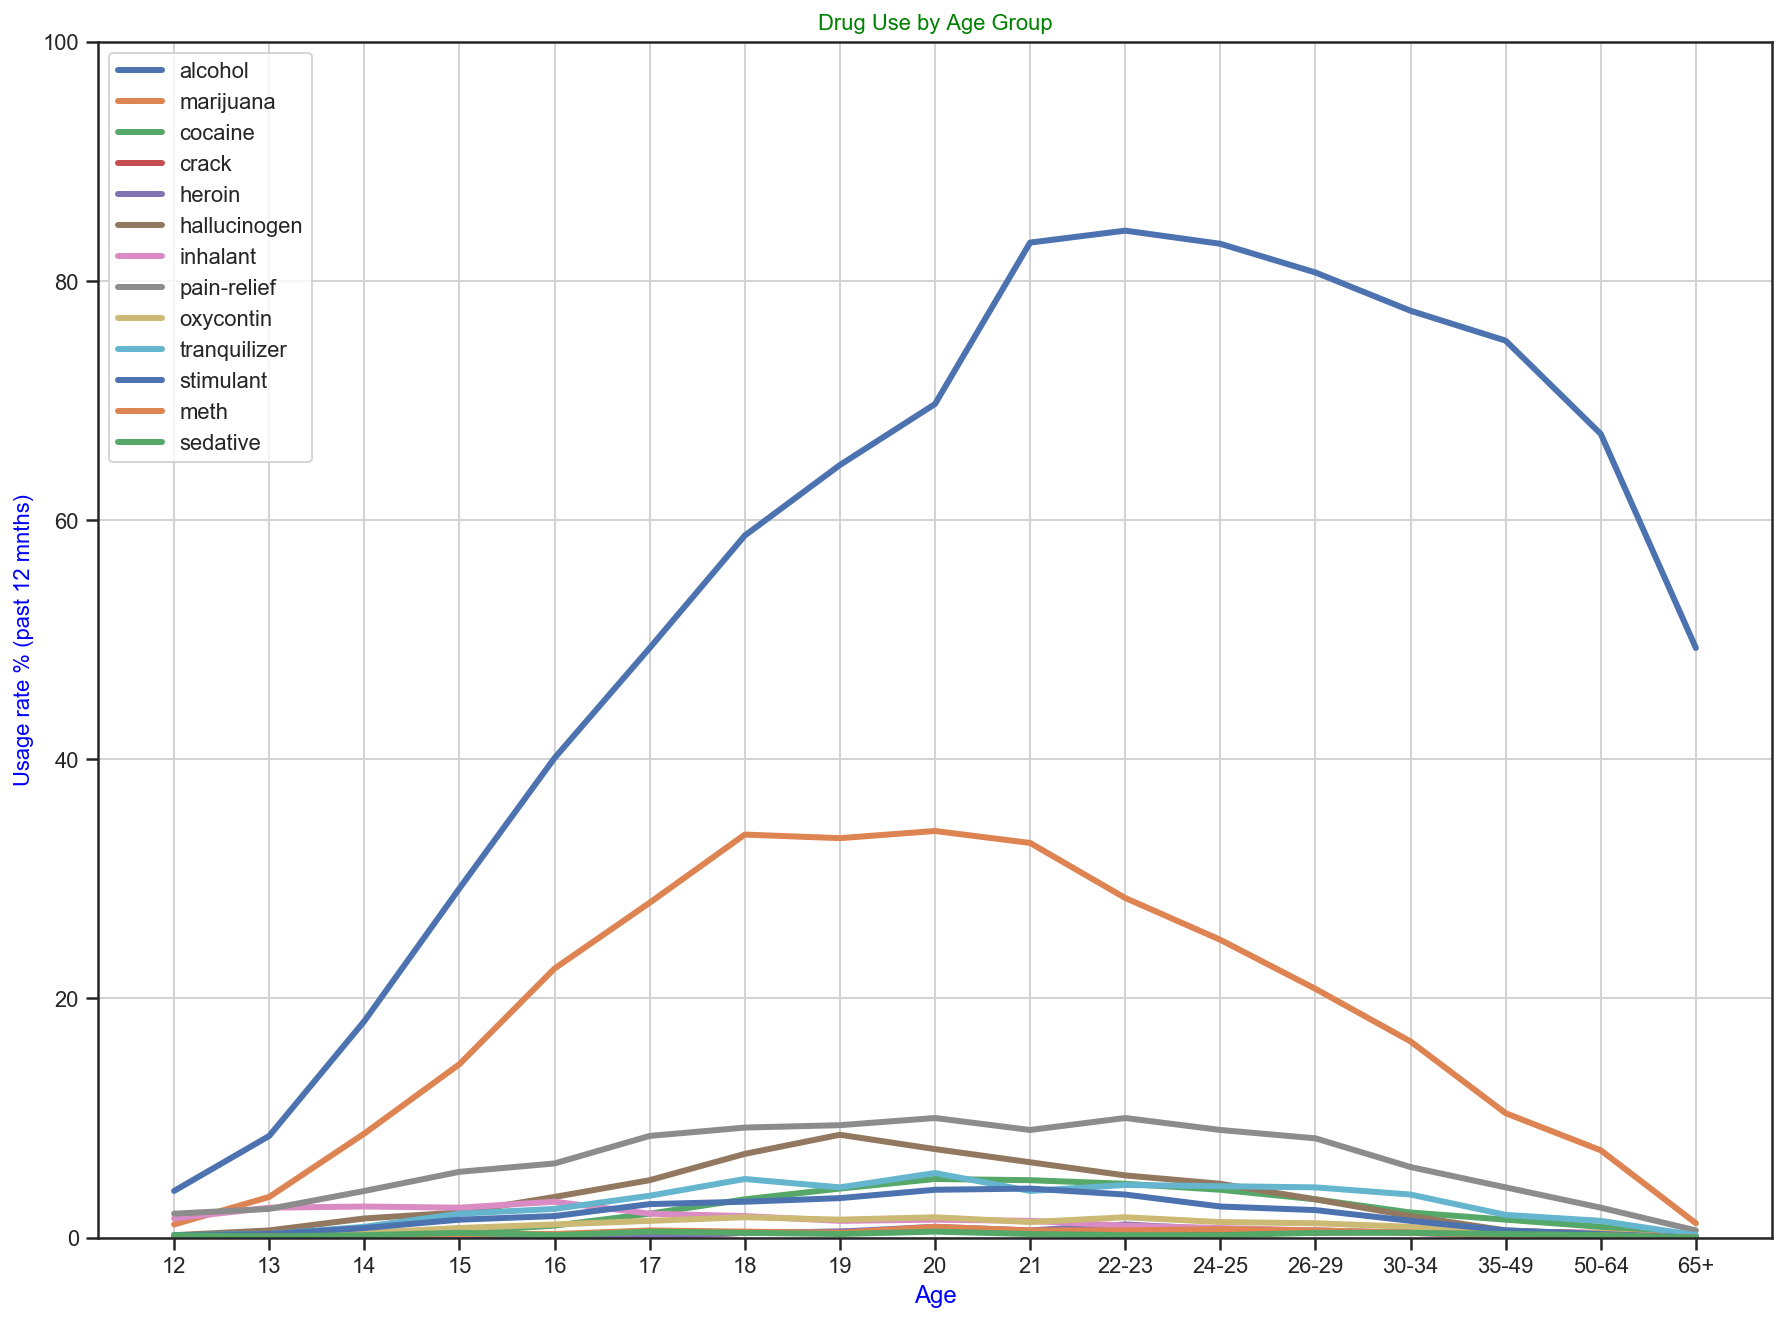

In [48]:
# Creating a viz for relationship with age over substance usage

drug.loc[:,'alcohol':'sedative':2].plot.line(figsize=(15,11),lw=3)
ax = plt.gca()
ax.grid(color='lightgrey')
plt.xlabel('Age',fontsize=12,color='Blue')
plt.ylabel('Usage rate % (past 12 mnths)',rotation=90,fontsize=11,color='Blue')
plt.ylim(0,100)
plt.title('Drug Use by Age Group',fontsize=11,color='Green')
plt.legend()
plt.xticks(np.arange(17),np.array(drug['age']));

**From the above graph, alcohol and marijuana are seen to have the highest usage among all age groups.**
<br>
Possible reasons could be:
- Alcohol and marijuana are more easily available
- Price is possibly lower compared to other drugs
- Alcohol and marijuana could be a gateway drug for other substances
- To further deep dive into other substances by excluding Alochol and Marijuana in the next analysis

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited you via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...
The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.
Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

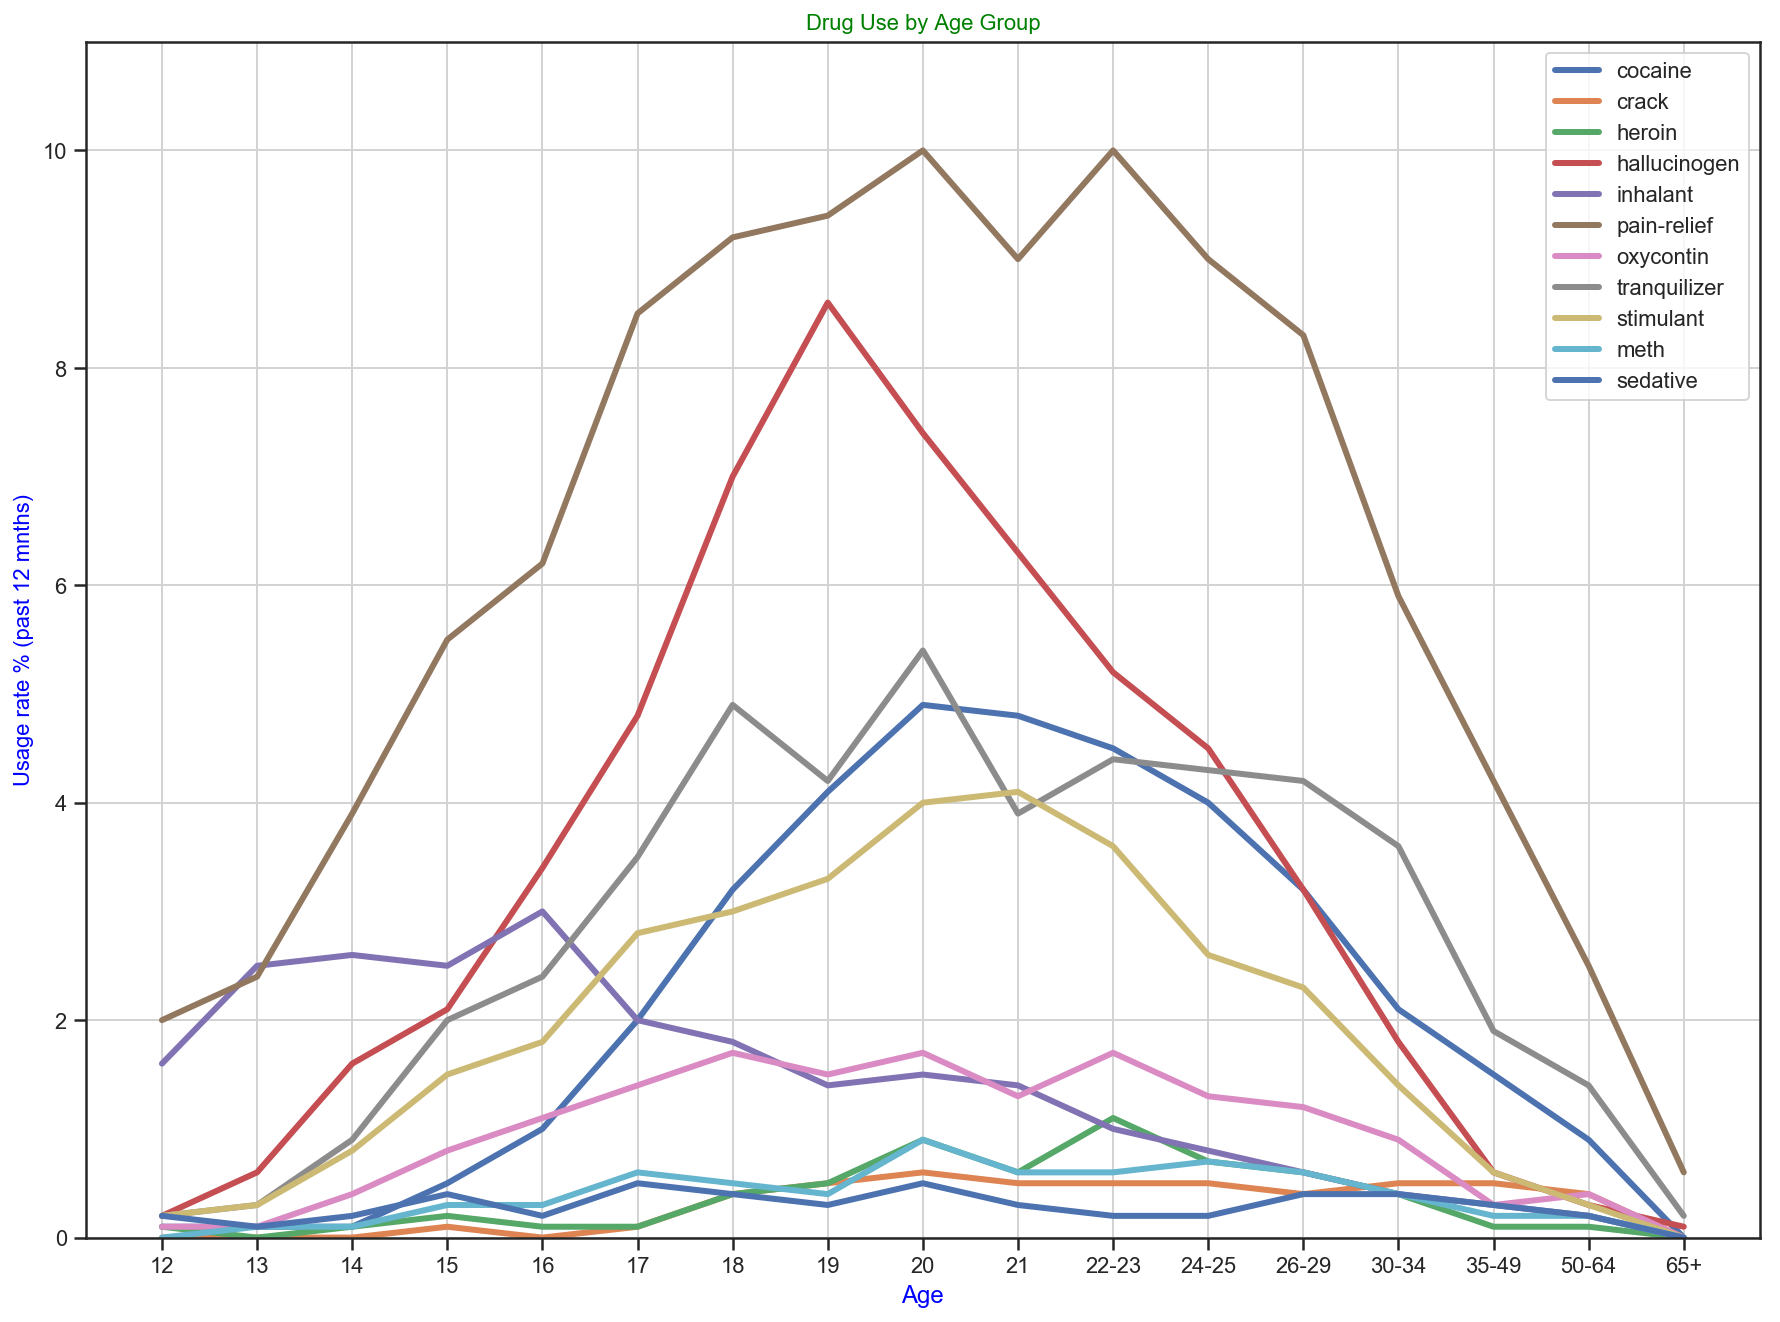

In [49]:
# Creating a viz for relationship with age over substance usage

drug.loc[:,'cocaine':'sedative':2].plot.line(figsize=(15,11),lw=3)
ax = plt.gca()
ax.grid(color='lightgrey')
plt.xlabel('Age',fontsize=12,color='Blue')
plt.ylabel('Usage rate % (past 12 mnths)',rotation=90,fontsize=11,color='Blue')
plt.ylim(0,11)
plt.title('Drug Use by Age Group',fontsize=11,color='Green')
plt.legend()
plt.xticks(np.arange(17),np.array(drug['age']));

**From the above, Pain-Relievers and Hallucinogen are the 3rd and 4th most used drugs**
<br>
Possible reasons could be:
- Pain relievers could also be easily assessable due low price and availability

In [50]:
drug.head()

,age,num,alcohol,alcohol_f,marijuana,marijuana_f,cocaine,cocaine_f,crack,crack_f,...,oxycontin,oxycontin_f,tranquilizer,tranquilizer_f,stimulant,stimulant_f,meth,meth_f,sedative,sedative_f
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [51]:
drug.drop('num',axis=1,inplace=True) 
drug_copy = drug 

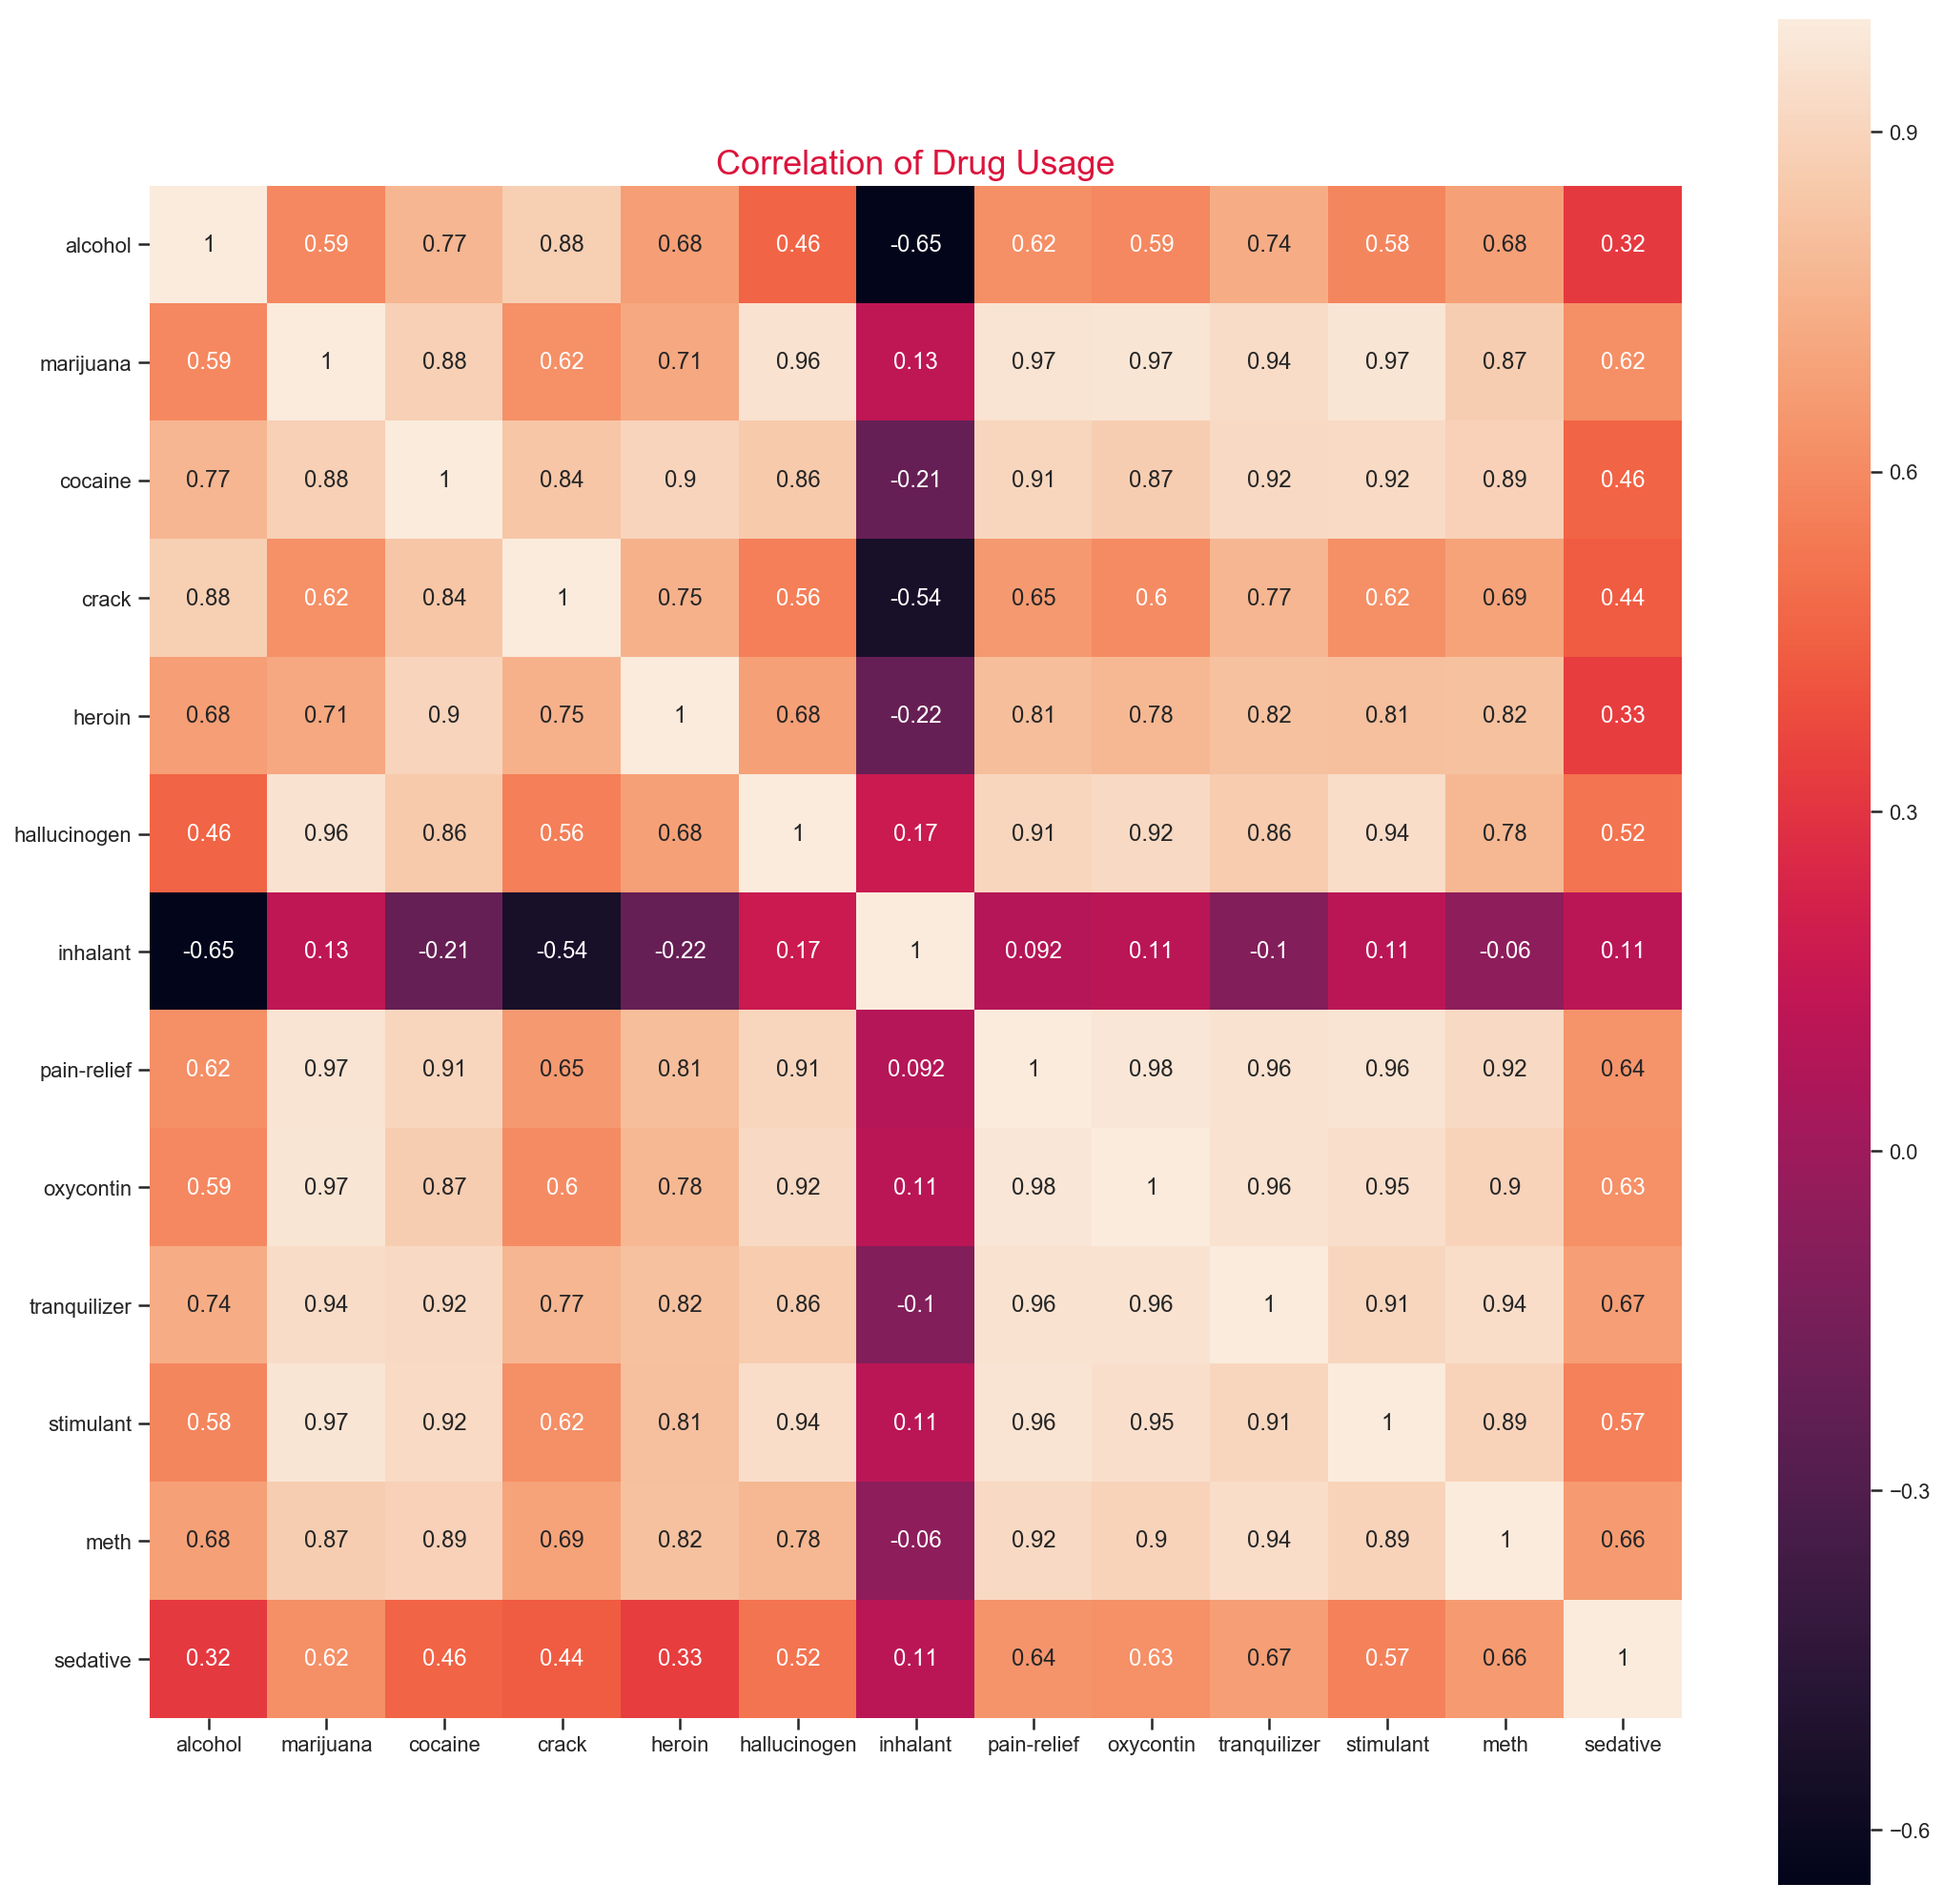

In [52]:
plt.figure(figsize=(18,18))
plt.title('Correlation of Drug Usage',y=1,size=18,color='Crimson')
sns.heatmap(drug_copy.loc[:,'alcohol'::2].corr(), vmax=1, square=True,annot=True)

**Observations on the above heatmap:**
- Inhalant has weak to no correlation with most of the other drugs.
- Even though alcohol is commonly consumed, it does not have a strong correlation with other drugs
- Apart from Alcohol, Inhalant and Sedative, drugs share a strong positive correlation with each other


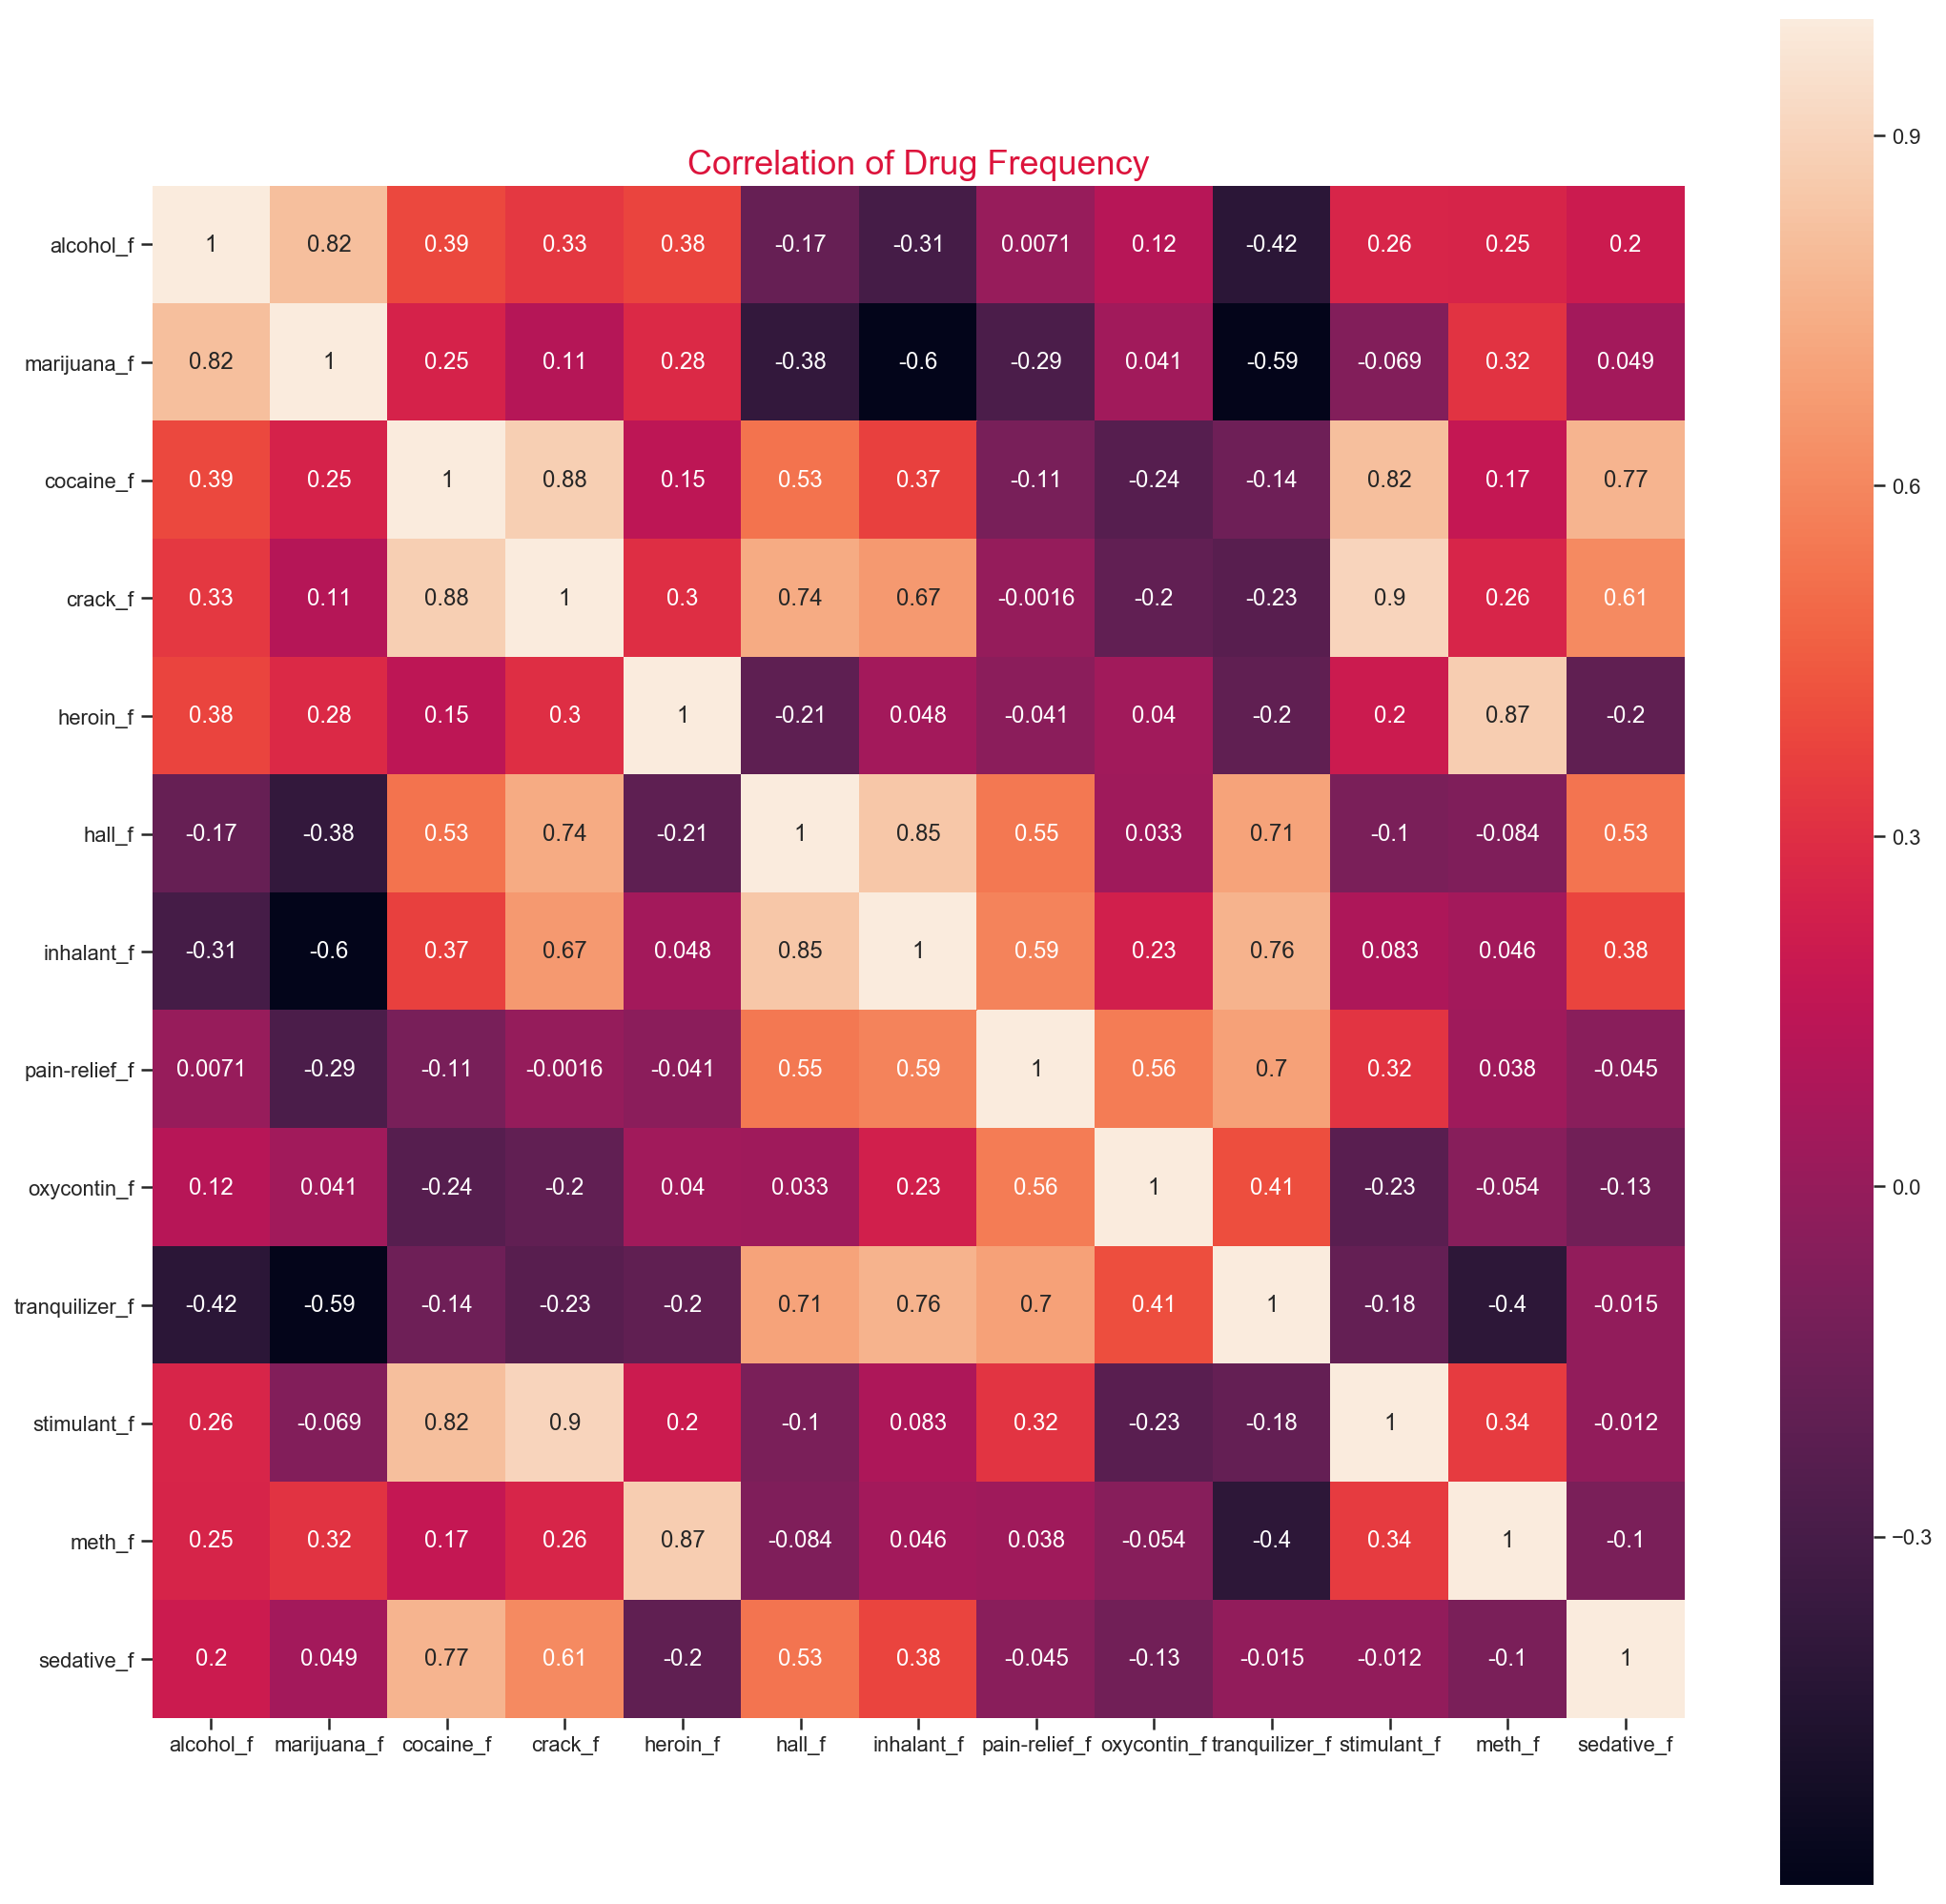

In [53]:
plt.figure(figsize=(18,18))
plt.title('Correlation of Drug Frequency',y=1,size=18,color='Crimson')
sns.heatmap(drug_copy.loc[:,'alcohol_f'::2].corr(), vmax=1, square=True,annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Question and deliverables** (Ivan's answer)

Question: In an earlier analysis, I had infered that alcohol and marijuana could be a starter drug which had led users to further take on other drugs. To test my theory on whether these "lighter" drugs were used prior to other heavier stuff:

- H0: Marijuana usage leads to hallucinogen usage
- H1: Marijuana usage does not lead to hallucinogen usage

In [54]:
# Check correlation
drug_m_h = drug[['marijuana','hallucinogen']]
drug_m_h.corr()

,marijuana,hallucinogen
marijuana,1.000000,0.959353
hallucinogen,0.959353,1.000000


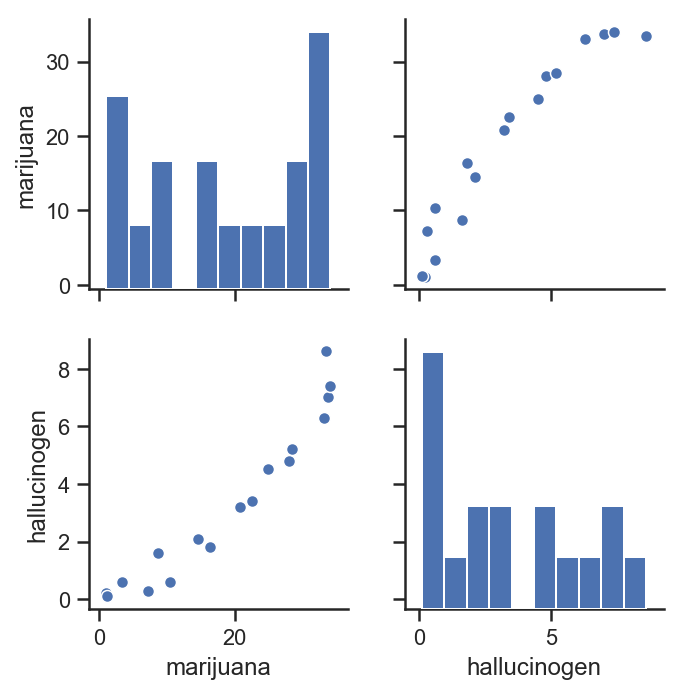

In [55]:
# Plotting a pair plot to see the relationship

sns.set(style="ticks", color_codes=True)
sns.pairplot(drug_m_h)

In [56]:
# From the above pair plot, there seems to be a strong positive correlation between marijuana use and hallucinogen

In [57]:
# Code here

result = stats.chi2_contingency([list(drug['marijuana']),list(drug['hallucinogen'])],correction=False)
print(result)

(3.54083405296351, 0.9994953879807221, 16, array([[ 1.10229309,  3.39167106,  8.73355298, 14.0754349 , 21.96107011,
        27.81170269, 34.51025303, 35.61254613, 35.10379547, 33.32316816,
        28.4900369 , 24.92878229, 20.35002636, 15.43210332,  9.32709541,
         6.44417501,  1.10229309],
       [ 0.19770691,  0.60832894,  1.56644702,  2.5245651 ,  3.93892989,
         4.98829731,  6.18974697,  6.38745387,  6.29620453,  5.97683184,
         5.1099631 ,  4.47121771,  3.64997364,  2.76789668,  1.67290459,
         1.15582499,  0.19770691]]))


**Report**

From the above results, the p-value is 0.999 which is higher than alpha (0.05). Therefore we cannot reject the null hypothesis
...

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [58]:
# 1. Pulling out rate variable

sat_no_rate = sat_scores[['State','Math','Verbal']]

**Question 2 (Answer)**
- An outlier is an observation which falls outside the overall pattern of a distribution.
- Usually an outlier could indicate some sort of problem; such as not fitting the model of study or an error in measurement

In [59]:
sat_no_rate.head()

,State,Math,Verbal
0,CT,510,509
1,NJ,513,499
2,MA,515,511
3,NY,505,495
4,NH,516,520


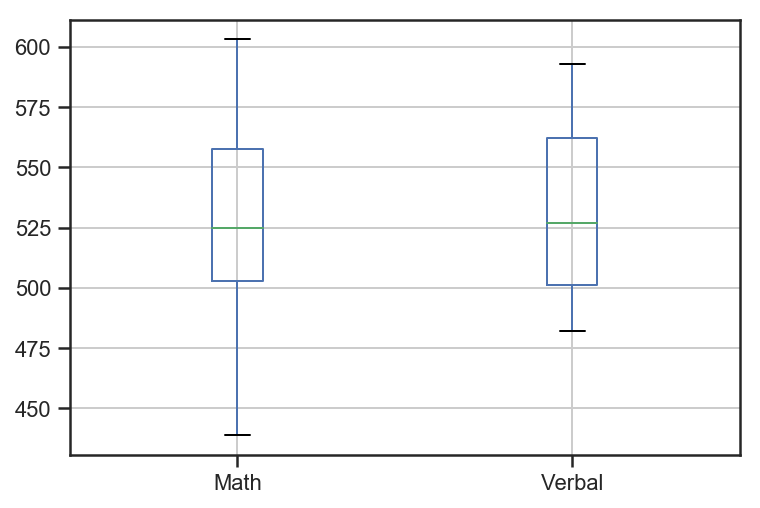

In [60]:
sat_no_rate.boxplot()

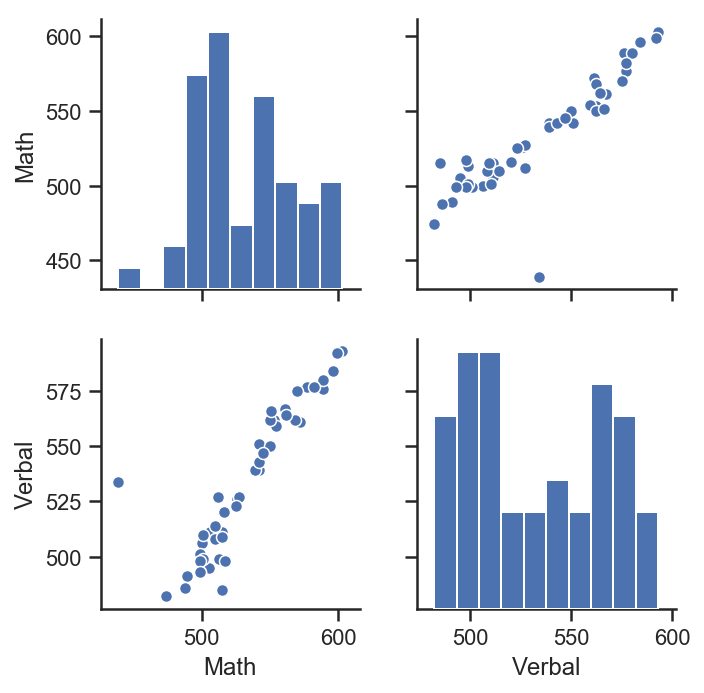

In [61]:
sns.pairplot(sat_no_rate)

Ivan: From the above plots, there seems to be an outlier with a verbal score between 525 and 550 and a math score of less than 450.

In [62]:
# 3. Finding the outlier

outlier = sat_no_rate[(sat_no_rate['Verbal']>525) & (sat_no_rate['Verbal']<550) & (sat_no_rate['Math']<450)]
print(outlier)

   State  Math  Verbal
27    OH   439     534


In [63]:
# 4. Dropping the row with outlier present
sat_no_outlier = sat_no_rate.drop([27],axis=0)

In [64]:
# Checking if outlier has really been removed
sat_no_outlier[25:30]

,State,Math,Verbal
25,NV,515,509
26,CO,542,539
28,MT,539,539
29,WV,512,527
30,ID,542,543


In [65]:
print(sat_no_rate.median())
print(sat_no_outlier.median())

print(sat_no_rate.describe())
print(sat_no_outlier.describe())

Math      525.0
Verbal    527.0
dtype: float64
Math      525.5
Verbal    526.5
dtype: float64
             Math      Verbal
count   51.000000   51.000000
mean   531.843137  532.529412
std     36.287393   33.360667
min    439.000000  482.000000
25%    503.000000  501.000000
50%    525.000000  527.000000
75%    557.500000  562.000000
max    603.000000  593.000000
             Math      Verbal
count   50.000000   50.000000
mean   533.700000  532.500000
std     34.120584   33.698695
min    474.000000  482.000000
25%    505.250000  501.000000
50%    525.500000  526.500000
75%    559.250000  562.000000
max    603.000000  593.000000


# Comparing Data w Outliers vs Clean Data + Explanation
**Median**
- Math has increased by 0.5
- Verbal has decreased by 1.5
Reasoning: The Outlier had a Math score which was below the math median and a verbal score that was above the verbal median.

**Mean**
- Math has increased
- Verbal has decreased
Reasoning: The Outlier had a Math score which was below the math mean and a verbal score that was above the verbal mean.

**Standard Deviation**
- Math has decreased 
- Verbal has increased
Reasoning: The Outlier had a Math score which was far from the Math mean score (439 vs 531) whereas the Verbal score was very near to the Verbal mean score (532 vs 534)

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


---

**Spearman rank correlation coefficient:**

Spearman's "rho" (as opposed to Pearson's "r") is a measure of correlation between two variables that is resistant to the magnitude of the two variables' deviations from their mean at each observation.

Recall that with Pearson's r, the covariance calculation prior to the correlation adjustment is, in fact, influenced by the magnitude change. Imagine for a single observation $n$ of $X$ and $Y$:

$X_{mean} = 0$

$Y_{mean} = 0$

$X_n = 3$

$Y_n = 2$

The numerator in the covariance sum for observation $n$ is:

$(3 - 0)(2 - 0) = 6$

But if $Y_n$ were deviating from it's mean less at that observation, the numerator of course is smaller:

$Y_n = 0.5$

$(3 - 0)(0.5 - 0) = 1.5$

**The spearman rho formula is:**

Let $Xr$ be the _rank of each variable in $X$_, and $Yr$ be the _rank of each variable in $Y$_:

### $$ rho =\frac{cov(Xr, Yr)}{std(Xr)std(Yr)}$$

It is just the correlation formula, but the variables have been converted to ranks!

Let's look at a basketball freethrow shooting example below to make this clear.

---

#### Basketball freethrow rate made per hour

Imagine you are practicing your basketball freethrows. Each hour your rate gets better, but there are marginal returns to your practicing:



In [66]:
hours_practiced = range(0, 50)

# Logistic growth for freethrows:
# a / (1 + b e-kx ),
# Asymptotic to y = a to right,
# Asymptotic to y = 0 to left,
# Passes through (0, a/(1+b) )
# Slow growth, followed by moderate growth, followed by slow growth

asymp_rate = 0.75
start_rate = 0.15
a_const = 0.75
b_const = 2.5
lrate = 0.18

freethrow_rate = np.array([a_const / (1 + (b_const*np.exp(-hr*lrate))) for hr in hours_practiced])



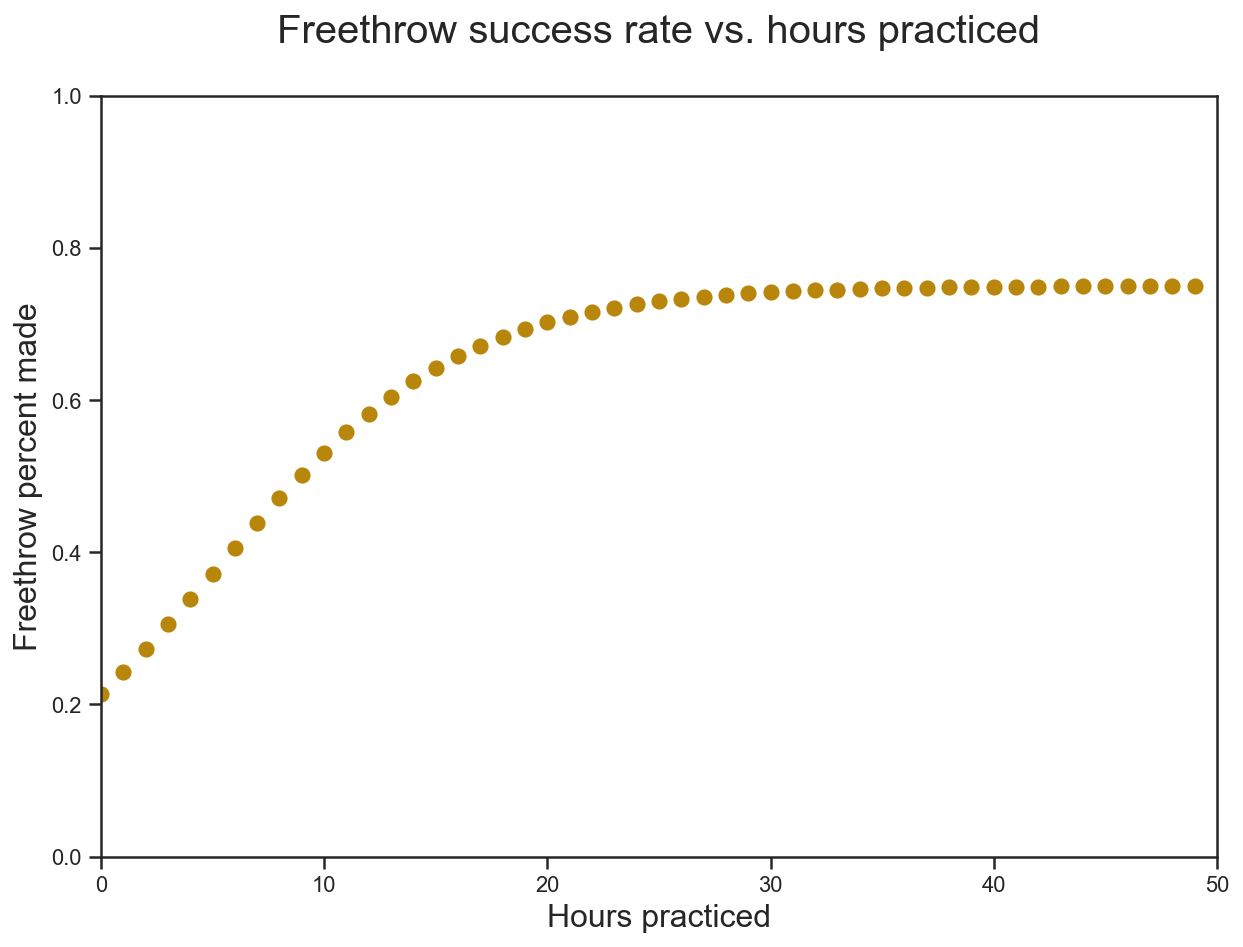

In [67]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()

ax.scatter(hours_practiced, freethrow_rate, color='darkgoldenrod', s=50)
ax.set_ylim([0,1])
ax.set_xlim([0,50])
ax.set_xlabel('Hours practiced', fontsize=16)
ax.set_ylabel('Freethrow percent made', fontsize=16)
ax.set_title('Freethrow success rate vs. hours practiced\n', fontsize=20)

plt.show()

What's the correlation between hours practiced and freethrow rate?

In [68]:
print (np.corrcoef(hours_practiced, freethrow_rate))

[[1.         0.84310254]
 [0.84310254 1.        ]]


It's a strong correlation, for sure, but you're also getting better and better consistently with each hour played, though not _as good_ as you did when you first started.

Spearman's rho is useful when you want a measure of correspondence for these kind of nonlinear relationships. In this example, spearman's rho is going to answer the question of the consistency in which you get better with practice, regardless of by how much.

In [69]:
# scipy.stats.rankdata will give you the ranks of the arrays
from scipy.stats import rankdata

def spearman_rho(X, Y):
    Xr = rankdata(X)
    print (Xr)
    Yr = rankdata(Y)
    print (Yr)
    return np.corrcoef(Xr, Yr)

In [70]:
print (spearman_rho(hours_practiced, freethrow_rate))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[[1. 1.]
 [1. 1.]]


Our rho = 1, indicating that every time hours_practiced increases, freethrow_rate also increases.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [71]:
rate = sat_scores.Rate

# scipy.stats.percentileofscore gives you percentiles for an array
# the kind=“weak” argument means a percentileofscore of a value indicates
# the percent of values that are less than or equal to the provided score.
from scipy.stats import percentileofscore
from scipy.stats import spearmanr

rate_pctl = np.array([percentileofscore(rate, r, kind='weak') for r in rate])
print (rate.values)
print (rate_pctl)

sat_scores['Rate_pctl'] = rate_pctl
print ('Californias rate percentile:', sat_scores.loc[(sat_scores.State == 'CA'), 'Rate_pctl'].values)

[82 81 79 77 72 71 71 69 69 68 67 65 65 63 60 57 56 55 54 53 53 52 51 51
 34 33 31 26 23 18 17 13 13 12 12 11 11  9  9  9  8  8  8  7  6  6  5  5
  4  4  4]
[100.          98.03921569  96.07843137  94.11764706  92.15686275
  90.19607843  90.19607843  86.2745098   86.2745098   82.35294118
  80.39215686  78.43137255  78.43137255  74.50980392  72.54901961
  70.58823529  68.62745098  66.66666667  64.70588235  62.74509804
  62.74509804  58.82352941  56.8627451   56.8627451   52.94117647
  50.98039216  49.01960784  47.05882353  45.09803922  43.1372549
  41.17647059  39.21568627  39.21568627  35.29411765  35.29411765
  31.37254902  31.37254902  27.45098039  27.45098039  27.45098039
  21.56862745  21.56862745  21.56862745  15.68627451  13.7254902
  13.7254902    9.80392157   9.80392157   5.88235294   5.88235294
   5.88235294]
Californias rate percentile: [56.8627451]


Percentiles of an array (with this definition) convert the numbers into a value that represents the percentage of the other values in the array that are less than or equal to the current value.

Spearman's rho is computing the correlations between the ranks of two variables. Percentiles are a ranking of the numbers as well. I've added a handful of massive outliers to the rate.

Compare:

- cor(rate_rank, rate_values)
- rho(rate_rank, rate_values)
- cor(rate_rank, rate_pctl)
- rho(rate_rank, rate_pctl

In [72]:
sat_rate_outliers = np.array(list(sat_scores.Rate.values) + [199., 1990., 4999., -10002.])

print ('Original values:')
print (np.corrcoef(rankdata(sat_rate_outliers), sat_rate_outliers))
print (spearmanr(rankdata(sat_rate_outliers), sat_rate_outliers))

print ('\nPercentile values:')
rate_outlier_pctl = np.array([percentileofscore(sat_rate_outliers, r, kind='weak') for r in sat_rate_outliers])
print (np.corrcoef(rankdata(sat_rate_outliers), rate_outlier_pctl))
print (spearmanr(rankdata(sat_rate_outliers), rate_outlier_pctl))



Original values:
[[1.         0.35878474]
 [0.35878474 1.        ]]
SpearmanrResult(correlation=1.0, pvalue=0.0)

Percentile values:
[[1.         0.99981687]
 [0.99981687 1.        ]]
SpearmanrResult(correlation=1.0, pvalue=0.0)


Correlations between the ranks and the percentiles are nearly perfect. Outliers no longer affect pearson's r strongly. You can see too that spearman's rho is the same for both (because, like percentiles, it is using ranks).